In [ ]:
import pandas as pd
from src.setup import get_base
from src.feature_engineering import engineer_features, build_pca_pipeline, build_cluster_pipeline, plot_pca_clusters
from src.analysis import run_pca, run_kmeans, plot_pca_clusters, find_optimal_k, pca
from sklearn.preprocessing import StandardScaler

ImportError: cannot import name 'cluster_profiles' from 'src.analysis' (/Users/kiko/Desktop/github/traveltide/src/analysis.py)

In [ ]:
# main_notebook.ipynb

# ==========================
# 1. Setup & Imports
# ==========================


# ==========================
# 2. Daten laden
# ==========================
df = get_base()

print("Rohdaten:")
display(df.head())

# ==========================
# 3. Feature Engineering
# ==========================
df_features = engineer_features(df)

print("Feature-Daten:")
display(df_features.head())

# ==========================
# 4. PCA
# ==========================

scaler = StandardScaler()
feat_scaled = scaler.fit_transform(df_features)
customers_scaled = pd.DataFrame(feat_scaled)
customers_scaled.index = df_features.index
customers_scaled.columns = df_features.columns

pca_df, pca, explained = run_pca(customers_scaled, n_components=0.9)
print("Varianzanteile der PCA:", explained)

print(pca_df.head())

# ==========================
# 5. Clustering
# ==========================
df_clusters, kmeans, sil = run_kmeans(df_features, n_clusters=4)
print("Silhouette Score:", sil)

# Cluster-Ergebnis ansehen
display(df_clusters[["cluster"]].value_counts())

# ==========================
# 6. Visualisierung
# =========================

Rohdaten:


,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_price_per_room_night_usd
0,101486-6d053e0f51884dddb339416c86d5b3a9,101486,NaN,2023-07-18 09:35:00,2023-07-18 09:35:22,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,101486-6de2ac91a8c24619a69a3d3ae7c28d61,101486,NaN,2023-03-21 10:16:00,2023-03-21 10:18:38,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,101486-7e8b450e5fe94345bd6c1ae9f479f073,101486,NaN,2023-02-11 17:05:00,2023-02-11 17:07:58,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3,101486-9e7d5ccc7e034bf7b7a5ad2f3befbe13,101486,NaN,2023-05-30 20:42:00,2023-05-30 20:44:15,True,False,0.1,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,101486-be6d02b11839441aa4107044d095cb99,101486,NaN,2023-03-06 21:50:00,2023-03-06 21:50:53,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


Feature-Daten:


,avg_flight_discount,total_flight_discount,avg_hotel_discount,total_hotel_discount,total_sessions,avg_session_duration,total_session_duration,total_flights_booked,total_hotels_booked,avg_flight_fare_usd,total_flight_fare_usd,n_unique_destinations
user_id,,,,,,,,,,,,
23557,0.000,0,0.250,2,8,1.277083,10.216667,0,2,0.000,0.00,0
94883,0.000,0,0.125,1,8,1.129167,9.033333,2,2,432.045,864.09,2
101486,0.250,2,0.000,0,8,2.037500,16.300000,1,2,189.910,189.91,1
101961,0.250,2,0.125,1,8,1.962500,15.700000,5,5,248.532,1242.66,5
106907,0.125,1,0.125,1,8,12.648584,101.188675,2,2,13902.060,27804.12,1


Varianzanteile der PCA: [0.31142207 0.19772711 0.1516215  0.13141483 0.09803944 0.08307577]
               PC1       PC2       PC3        PC4       PC5       PC6
user_id                                                              
23557    -2.060851 -0.670579 -2.376822  -0.146640  0.398517 -0.225077
94883    -1.188785  1.040890 -1.304074   0.465568  0.156663 -0.242438
101486   -1.570140 -0.276096  1.507929   0.382240  0.440102 -0.327190
101961    1.741698  1.899358  0.965972  -1.526903 -0.629641 -0.617489
106907   11.258379 -1.790096 -2.202533  19.511779 -9.091943  0.450986
Silhouette Score: 0.560864928998855


cluster
0          4213
2          1601
1           165
3            19
Name: count, dtype: int64

Silhouette Scores für verschiedene k:
k=2: Silhouette=0.863
k=3: Silhouette=0.620
k=4: Silhouette=0.561
k=5: Silhouette=0.525
k=6: Silhouette=0.504
k=7: Silhouette=0.494
k=8: Silhouette=0.495
k=9: Silhouette=0.494
k=10: Silhouette=0.480

Optimale Clusterzahl: k=2 mit Silhouette=0.863


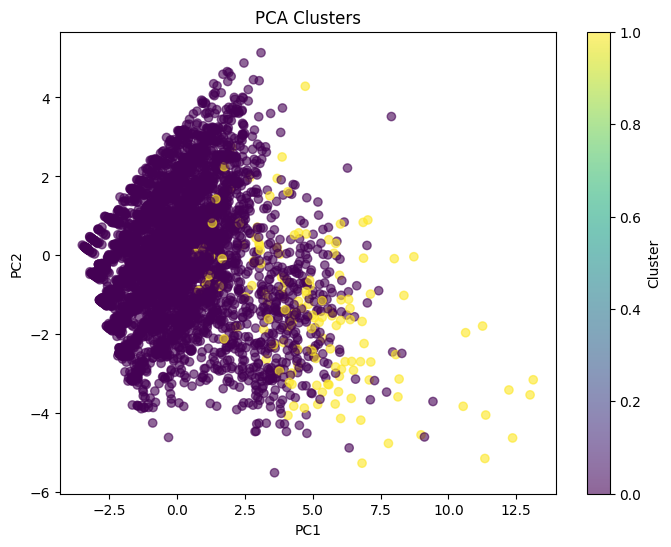

In [ ]:


# ==========================
# 5. Optimale Clusterzahl finden
# ==========================
results = find_optimal_k(df_features, k_min=2, k_max=10)

print("Silhouette Scores für verschiedene k:")
for k, sil in results:
    print(f"k={k}: Silhouette={sil:.3f}")

# Bestes k finden
best_k, best_sil = max(results, key=lambda x: x[1])
print(f"\nOptimale Clusterzahl: k={best_k} mit Silhouette={best_sil:.3f}")

# ==========================
# 6. Clustering mit best_k
# ==========================
df_clusters, kmeans, sil = run_kmeans(df_features, n_clusters=best_k)
plot_pca_clusters(pca_df, df_clusters["cluster"])

In [ ]:
from src.cluster_analysis import

# Cluster-Profile berechnen
profile_num, profile_cat = cluster_profiles(df_clusters)

print("Numerische Merkmale pro Cluster:")
display(profile_num)

print("Häufigste Kategorien pro Cluster:")
display(profile_cat)

Numerische Merkmale pro Cluster:


,avg_flight_discount,total_flight_discount,avg_hotel_discount,total_hotel_discount,total_sessions,avg_session_duration,total_session_duration,total_flights_booked,total_hotels_booked,avg_flight_fare_usd,total_flight_fare_usd,n_unique_destinations
cluster,,,,,,,,,,,,
0,0.178989,1.465767,0.136379,1.116271,8.185590,2.930583,24.024006,2.348643,2.462523,388.724649,1042.655279,2.144101
1,0.250355,2.049645,0.223205,1.829787,8.234043,10.708068,87.571708,3.241135,2.758865,3576.651671,9583.056099,2.439716


Häufigste Kategorien pro Cluster:


""


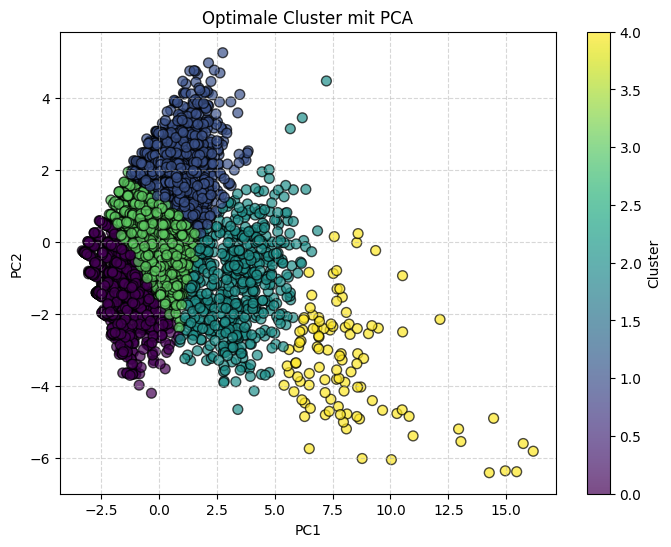

In [ ]:


# --- PCA nur für Visualisierung ---
pca_pipeline = build_pca_pipeline(n_components=0.9)
pca_data = pca_pipeline.fit_transform(df_clusters)

# --- Clustering ---
cluster_pipeline = build_cluster_pipeline(n_clusters=5, n_components=2)
cluster_pipeline.fit(df_clusters)
labels = cluster_pipeline["kmeans"].labels_

# --- Plot ---
pca_data_clustered = cluster_pipeline["pca"].transform(cluster_pipeline["scaler"].transform(df_clusters))
plot_pca_clusters(pca_data_clustered, labels, title="Optimale Cluster mit PCA")

In [ ]:

pca(df_features)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5
avg_flight_discount,0.154916,-0.369304,0.515859,-0.174961,-0.196854,-0.088754
total_flight_discount,0.157800,-0.368869,0.516806,-0.180866,-0.197072,-0.006463
avg_hotel_discount,0.200518,-0.323616,-0.475633,-0.295722,-0.200052,-0.062093
total_hotel_discount,0.203547,-0.323450,-0.472514,-0.300889,-0.200019,0.007772
total_sessions,0.044504,-0.012068,0.031632,-0.078415,-0.028312,0.991362
avg_session_duration,0.373117,-0.210036,-0.011105,0.138643,0.539639,-0.017533
total_session_duration,0.374576,-0.208896,-0.009098,0.131892,0.539172,0.030772
total_flights_booked,0.394185,0.363819,0.057527,-0.196113,-0.030877,-0.032371
total_hotels_booked,0.359073,0.341684,0.059331,-0.238199,0.010609,-0.025895
avg_flight_fare_usd,0.252238,-0.064848,-0.059448,0.585414,-0.378193,0.027757


/Users/kiko/Desktop/github/traveltide/src/analysis.py:92: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


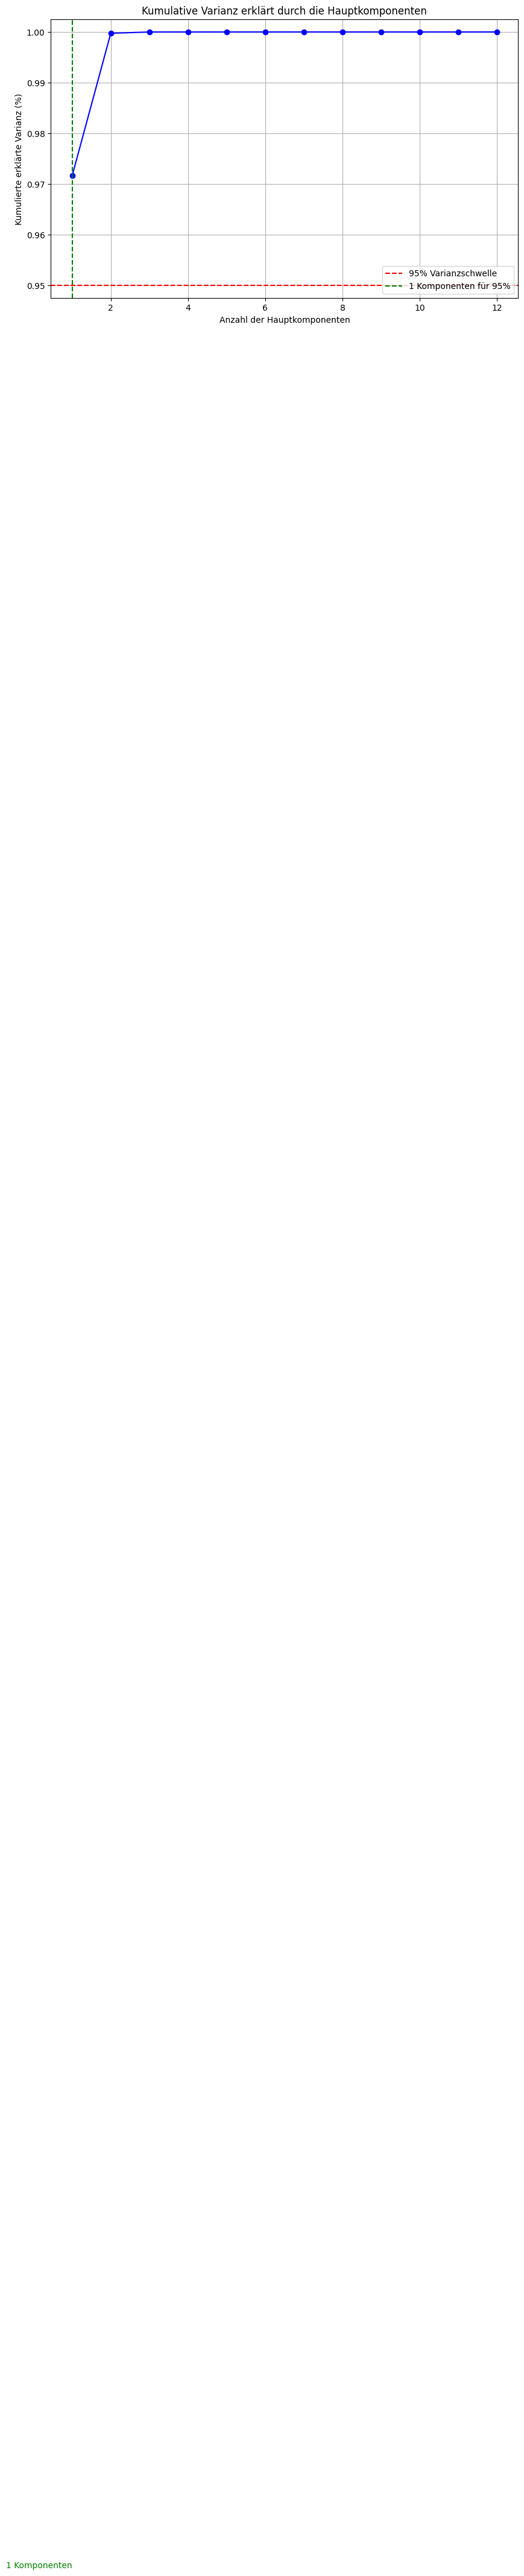

In [ ]:
from src.analysis import pca_analysis

pca_analysis(df_features)